# Intros
This is a starter kernel ...

In [1]:
# analytics libraries installed listed in the kaggle/python docker image: https://github.com/kaggle/docker-python

# Input data files are available in the "../input/" directory.
#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

In [2]:
import csv

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
#matplotlib.style.use('ggplot')
import pylab
import seaborn as sns

from IPython.core.display import display, HTML

# Data samples and traits

In [3]:
data = pd.read_csv("../input/Iris.csv", header = 0)
#reset index
data = data.reset_index()
data.head()

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
species_list = list(data["Species"].unique())
print("Types of species: %s\n" % species_list)

print("Dataset length: %i\n" % len(data))

print("Sepal length range: [%s, %s]" % (min(data["SepalLengthCm"]), max(data["SepalLengthCm"])))
print("Sepal width range:  [%s, %s]" % (min(data["SepalWidthCm"]), max(data["SepalLengthCm"])))
print("Petal length range: [%s, %s]" % (min(data["PetalLengthCm"]), max(data["PetalLengthCm"])))
print("Petal width range:  [%s, %s]\n" % (min(data["PetalWidthCm"]), max(data["PetalWidthCm"])))

print("Sepal length variance:\t %f" % np.var(data["SepalLengthCm"]))
print("Sepal width variance: \t %f" % np.var(data["SepalWidthCm"]))
print("Petal length variance:\t %f" % np.var(data["PetalLengthCm"]))
print("Petal width variance: \t %f\n" % np.var(data["PetalWidthCm"]))

print("Sepal length stddev:\t %f" % np.std(data["SepalLengthCm"]))
print("Sepal width stddev: \t %f" % np.std(data["SepalWidthCm"]))
print("Petal length stddev:\t %f" % np.std(data["PetalLengthCm"]))
print("Petal width stddev: \t %f\n" % np.std(data["PetalWidthCm"]))

print("Data describe\n---")
print(data[data.columns[2:]].describe())

Types of species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Dataset length: 150

Sepal length range: [4.3, 7.9]
Sepal width range:  [2.0, 7.9]
Petal length range: [1.0, 6.9]
Petal width range:  [0.1, 2.5]

Sepal length variance:	 0.681122
Sepal width variance: 	 0.186751
Petal length variance:	 3.092425
Petal width variance: 	 0.578532

Sepal length stddev:	 0.825301
Sepal width stddev: 	 0.432147
Petal length stddev:	 1.758529
Petal width stddev: 	 0.760613

Data describe
---
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.8

**3 types of species**  
Relatively small dataset


# Data analysis - distributions

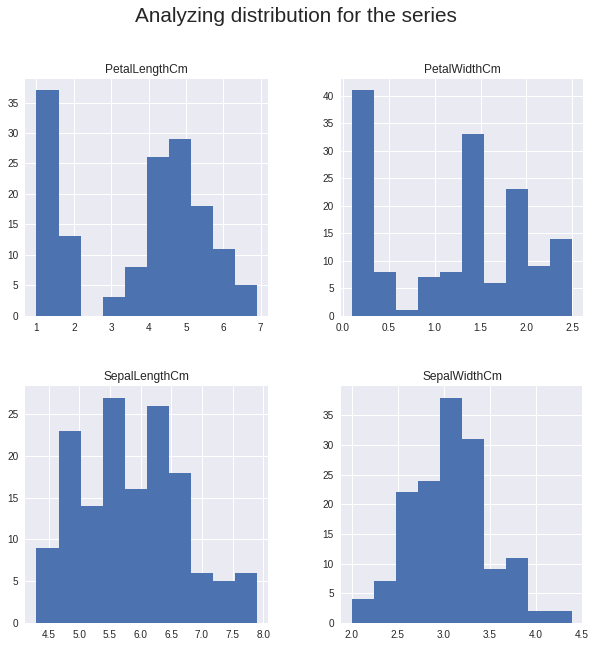

In [5]:

# data.hist calls data.plot
# pandas.DataFrame.plot() returns a matplotlib axis
data.hist(
    column=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"],
    figsize=(10, 10)
    #,sharey=True, sharex=True
)
pylab.suptitle("Analyzing distribution for the series", fontsize="xx-large")

#alternative
#plt.subplot(2,3,1)  # if using subplot
#data.hist(...)
#plt.title('your title')

*At first sight*, **Petal length** and **petal width** seem to **diverge** from the **normal distribution**.

In [6]:
import scipy.stats as stats

#print("Sepal length variance:\t %f" % np.var(data["SepalLengthCm"]))
#print("Sepal width variance: \t %f" % np.var(data["SepalWidthCm"]))
#print("Petal length variance:\t %f" % np.var(data["PetalLengthCm"]))
#print("Petal width variance: \t %f\n" % np.var(data["PetalWidthCm"]))

for param in ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]:
    z, pval = stats.normaltest(data[param])
    #print(z)
    if(pval < 0.055):
        print("%s has a p-value of %f - distribution is not normal" % (param, pval))
    else:
        print("%s has a p-value of %f" % (param, pval))


SepalLengthCm has a p-value of 0.056824
SepalWidthCm has a p-value of 0.167241
PetalLengthCm has a p-value of 0.000000 - distribution is not normal
PetalWidthCm has a p-value of 0.000000 - distribution is not normal


Hypothesis has been confirmed. Why ?

# Data analysis - correlations

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,NaN,NaN,NaN
SepalWidthCm,-0.109369,1.000000,NaN,NaN
PetalLengthCm,0.871754,-0.420516,1.000000,NaN
PetalWidthCm,0.817954,-0.356544,0.962757,1.0


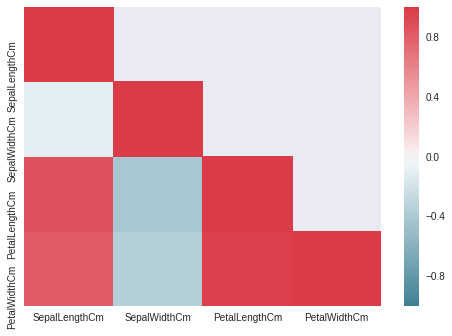

In [7]:
display(HTML('<h1>Analyzing the ' +
             '<a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">' +
             'Pearson correlation coefficient</a></h1>'))

# data without the indexes
dt = data[data.columns[2:]]

# method : {‘pearson’, ‘kendall’, ‘spearman’}
corr = dt.corr(method="pearson") #returns a dataframe, so it can be reused

# eliminate upper triangle for readability
bool_upper_matrix = np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(bool_upper_matrix)
display(corr)
# alternate method: http://seaborn.pydata.org/examples/many_pairwise_correlations.html

# seaborn matrix here
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Interpretation
Diagonal values and upper triangle are ignored (melted the upper triangle through **np.tril** and **df.where**).  
Naturally, we find:

+ a **high positive correlation** between PetalWidth and PetalLength (**0.96**)
+ a **high positive correlation** between PetalLength and SepalLength (**0.87**)
+ a **high positive correlation** between PetalWidth and SepalLength (**0.81**)

As such, we observe correlations between these main attributes: **PetalWidth**, **PetalLength** and **SepalLength**.

### Theory
PCC is:

+ 1 is total positive linear correlation
+ 0 is no linear correlation
+ −1 is total negative linear correlation

## Check correlation in 3D

In [8]:
from mpl_toolkits.mplot3d import Axes3D

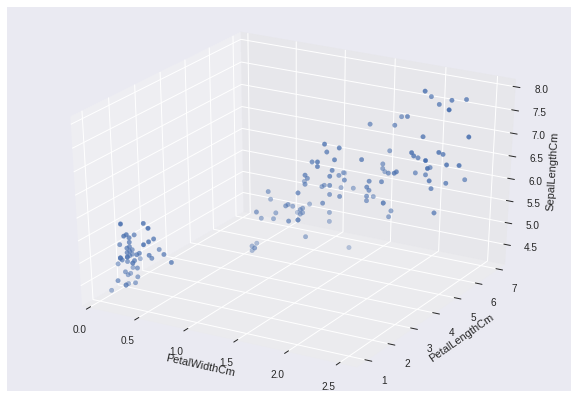

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = [data["PetalWidthCm"], data["PetalLengthCm"]]
n = 100
ax.scatter(data["PetalWidthCm"], data["PetalLengthCm"], data["SepalLengthCm"])


ax.set_xlabel('PetalWidthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('SepalLengthCm')

plt.tight_layout(pad=0.5)
plt.show()

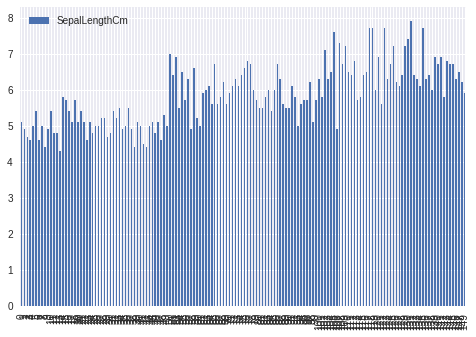

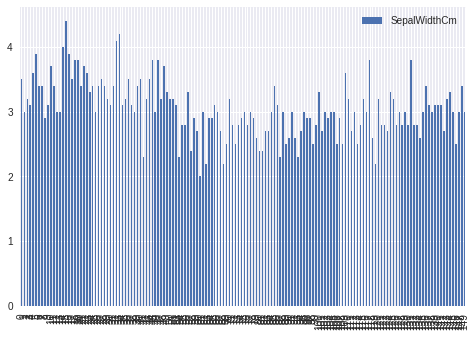

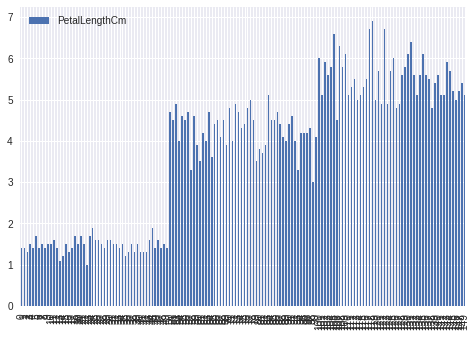

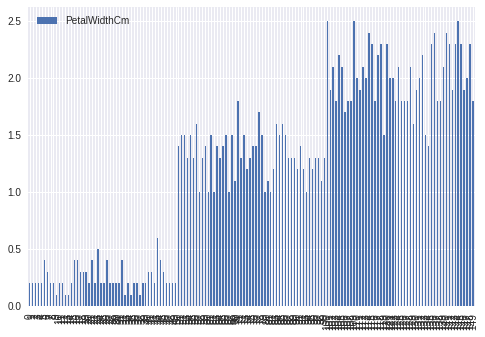

In [10]:
data[data.columns[2:3]].plot.bar() #x=data["Index"], y=data["PetalLengthCm"]
data[data.columns[3:4]].plot.bar()
data[data.columns[4:5]].plot.bar()
data[data.columns[5:6]].plot.bar()

# Data analysis - clusterization

In [11]:
from sklearn import linear_model

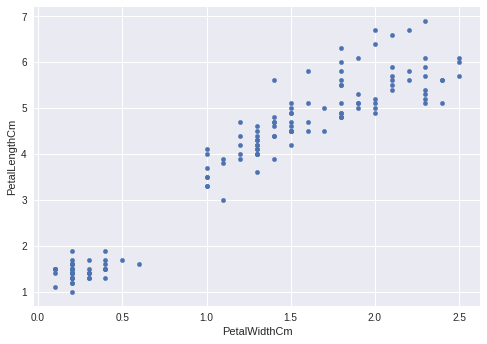

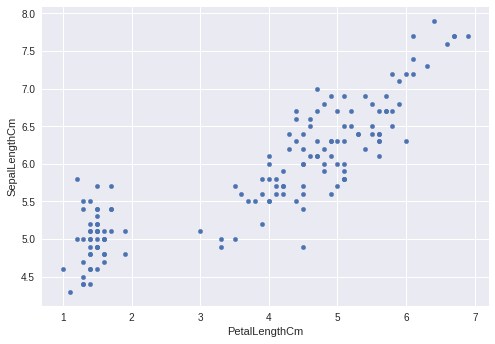

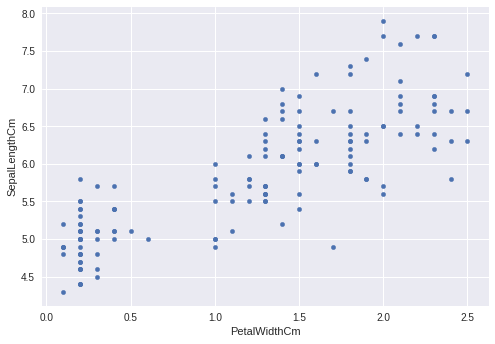

In [12]:
#pd.scatter_matrix(dt, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#sns.pairplot(dt)
display(HTML('<h1>Scatterplots for the correlating pairs</h1>'))

dt.plot(kind='scatter', x='PetalWidthCm', y='PetalLengthCm');
dt.plot(kind='scatter', x='PetalLengthCm', y='SepalLengthCm');
dt.plot(kind='scatter', x='PetalWidthCm', y='SepalLengthCm');

# --- linear regreesion visualization

# TODO: random selection method from sklearn
#top_corr_x_train = data["PetalWidthCm"][0:75]
#top_corr_y_train = data["PetalLengthCm"][0:75]
#top_corr_x_test = data["PetalWidthCm"][75:]
#top_corr_y_test = data["PetalLengthCm"][75:]
#
#regr = linear_model.LinearRegression()
#
#regr.fit(top_corr_x_train, top_corr_y_train)
#
## The coefficients
##print('Coefficients: \n', regr.coef_)
## The mean squared error
#print("Mean squared error: %.2f"
#      % np.mean((regr.predict(top_corr_x_test) - top_corr_y_test) ** 2))
## Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regr.score(top_corr_x_test, top_corr_y_test))
#
#plt.plot(top_corr_x_test, regr.predict(top_corr_x_test), color='blue',
#         linewidth=3)
#
#prediction = regr.predict(top_corr_x_test)
##prediction = prediction[:]
#print(prediction)
#print("Length: " + len(top_corr_x_test))
#
#plt.xticks(())
#plt.yticks(())
#
#plt.show()

In [13]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

import math
import random
from numpy.random import permutation

In [14]:
data_spl = data[data.columns[2:6]]

random_indices = permutation(data_spl.index)
# Set a cutoff for how many items we want in the test set (in this case 1/3 of the items)
test_cutoff = math.floor(len(data_spl)/3)
# Generate the test set by taking the first 1/3 of the randomly shuffled indices.
test = data_spl.loc[random_indices[1:test_cutoff]]
# Generate the train set with the rest of the data.
train = data_spl.loc[random_indices[test_cutoff:]]

In [15]:
#knn
def predictKNN(train,labels,test, n_neighbors = 2):
    print("start knn")
    knn = neighbors.KNeighborsClassifier()
    knn.fit(train, labels) 
    probabilities = knn.predict_proba(test)
    predictions = knn.predict(test)
    bestScores = probabilities.max(axis=1)
    print("done with knn")
    return predictions, bestScores


data_sk = np.array(data)
#print(data_sk)

# import some data to play with
#eiris = datasets.load_iris()
#print(data["PetalWidthCm"].shape)
#print(len(data["PetalLengthCm"]))

#display(dt["PetalWidthCm"].head())

X = [data["PetalWidthCm"], data["PetalLengthCm"]]
y = ["PetalWidthCm", "PetalLengthCm"] #["PetalWidthCm", "PetalLengthCm"]

X = [np.array(data["PetalWidthCm"]), np.array(data["PetalLengthCm"])]

#data.columns = range(data.shape[1])
X = np.array(data[data.columns[2:4]])#.astype(np.float)
#X = data.columns[2:6]
#print(X)
Y = np.array(data[data.columns[0:1]]).ravel() #.T
#print(y.shape)

# h = .02  # step size in the mesh

# # Create color maps
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# for weights in ['uniform', 'distance']:
#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
#     x_min = min(X[0]) - 1 #X[0].min() - 1 #min(X[0]) - 1
#     x_max = max(X[0]) + 1
#     y_min = min(X[1]) - 1
#     y_max = max(X[1]) + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
#     #test = np.c_[xx.ravel(), yy.ravel()]
    
    
#     #clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
#     #clf.fit(X, y)
#     Z, scores = predictKNN(X,y,test)
#     #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

   
#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("3-Class classification (k = %i, weights = '%s')"
#               % (n_neighbors, weights))

# plt.show()

In [16]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target
# print(X)
# print(Y)
# print(np.bincount(Y, minlength=np.size(Y)))

,index,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5,5.0,3.6,1.4,0.2,Iris-setosa


Types of species: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Dataset length: 150

Sepal length range: [4.3, 7.9]
Sepal width range:  [2.0, 7.9]
Petal length range: [1.0, 6.9]
Petal width range:  [0.1, 2.5]

Sepal length variance:	 0.681122
Sepal width variance: 	 0.186751
Petal length variance:	 3.092425
Petal width variance: 	 0.578532

Sepal length stddev:	 0.825301
Sepal width stddev: 	 0.432147
Petal length stddev:	 1.758529
Petal width stddev: 	 0.760613

Data describe
---
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.8

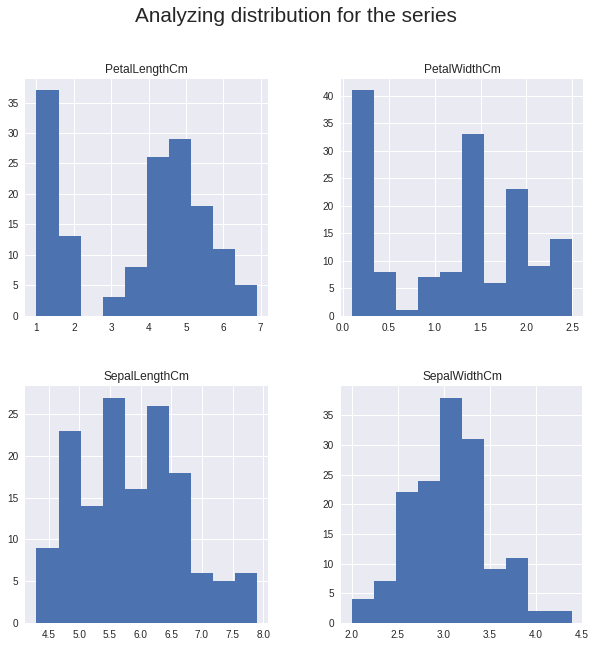

SepalLengthCm has a p-value of 0.056824
SepalWidthCm has a p-value of 0.167241
PetalLengthCm has a p-value of 0.000000 - distribution is not normal
PetalWidthCm has a p-value of 0.000000 - distribution is not normal


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,NaN,NaN,NaN
SepalWidthCm,-0.109369,1.000000,NaN,NaN
PetalLengthCm,0.871754,-0.420516,1.000000,NaN
PetalWidthCm,0.817954,-0.356544,0.962757,1.0


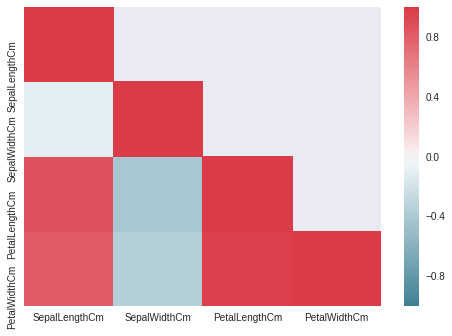

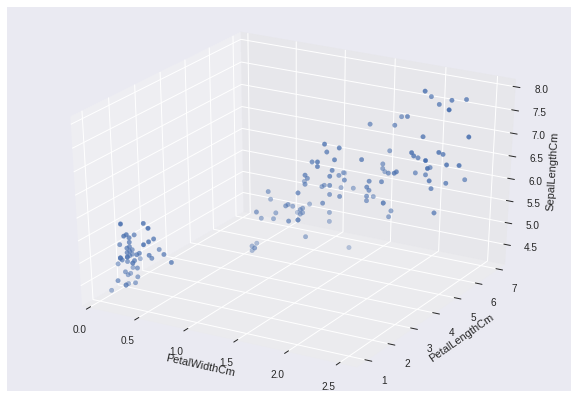

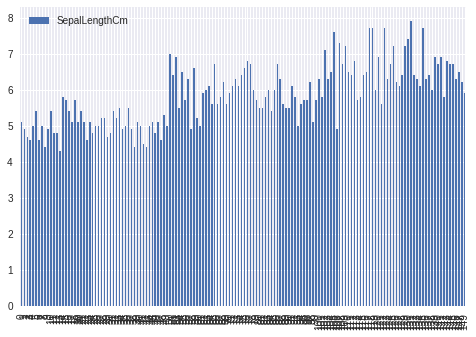

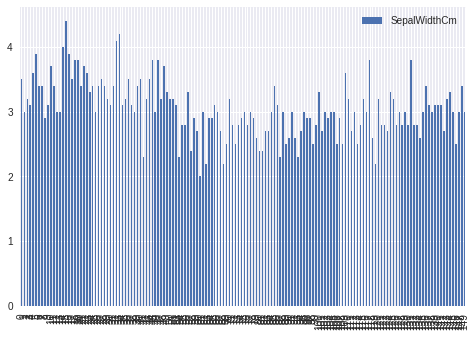

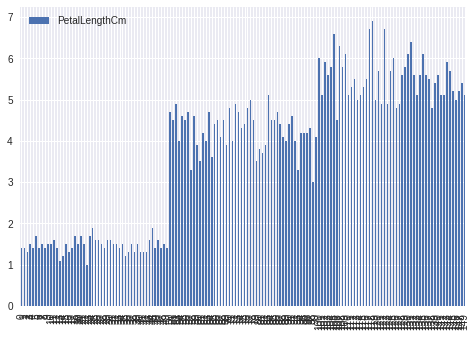

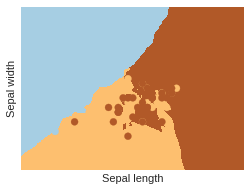

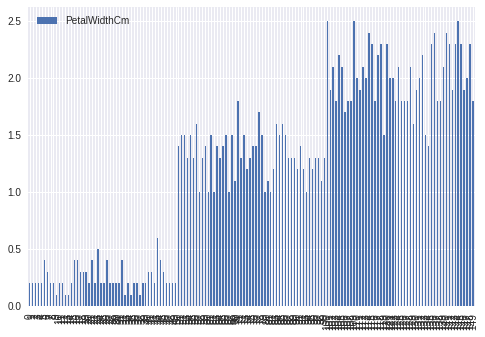

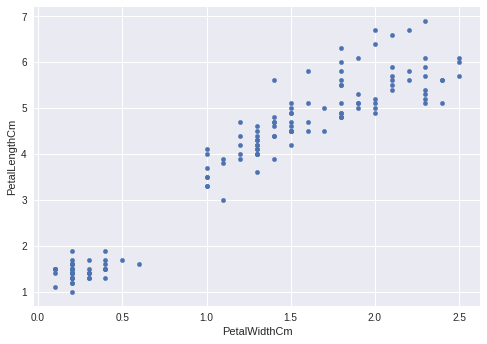

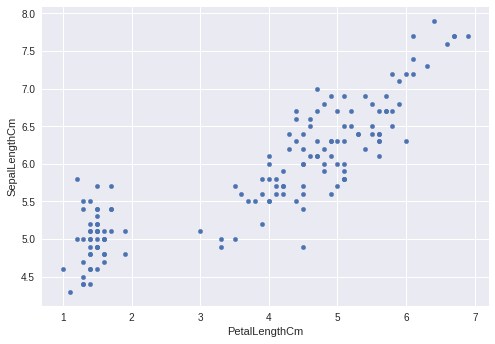

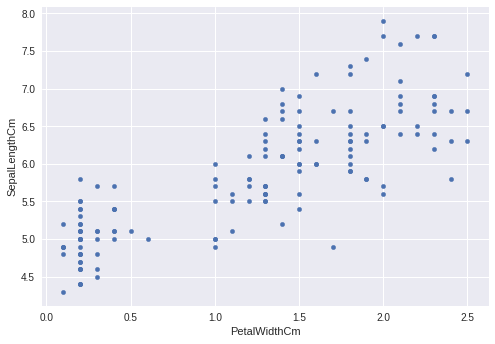

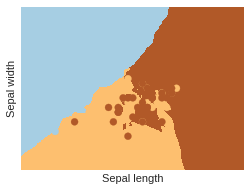

In [17]:
h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Plot also the training points
plt.scatter(X[:,0], X[:,1],c=Y )
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()